[![General Assembly Logo](https://camo.githubusercontent.com/1a91b05b8f4d44b5bbfb83abac2b0996d8e26c92/687474703a2f2f692e696d6775722e636f6d2f6b6538555354712e706e67)](https://generalassemb.ly/education/web-development-immersive)
![Misk Logo](https://i.ibb.co/KmXhJbm/Webp-net-resizeimage-1.png)

## Group 5 - Titanic: Machine Learning from Disaster
- [Data Cleaining](#Cleaning)
- [Exploratory Data Analysis](#EDA)
- [Model Building](#Modeling)



In [127]:
#import needed libarys 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [128]:
import pandas as pd
gender_submission = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train (1).csv")

In [129]:
train.head(2) # with survi col 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [130]:
test.head(2) # without survaived column 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [131]:
test[test.Fare.isnull()]
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [132]:
test.Cabin.fillna('Unkown' , inplace = True)
test['Fare'] = test.groupby(["Sex", 'Pclass'])["Fare"].transform(lambda x: x.fillna(x.mean()))
test['Age'] = test.groupby(["Sex", 'Pclass'])["Age"].transform(lambda x: x.fillna(x.mean()))

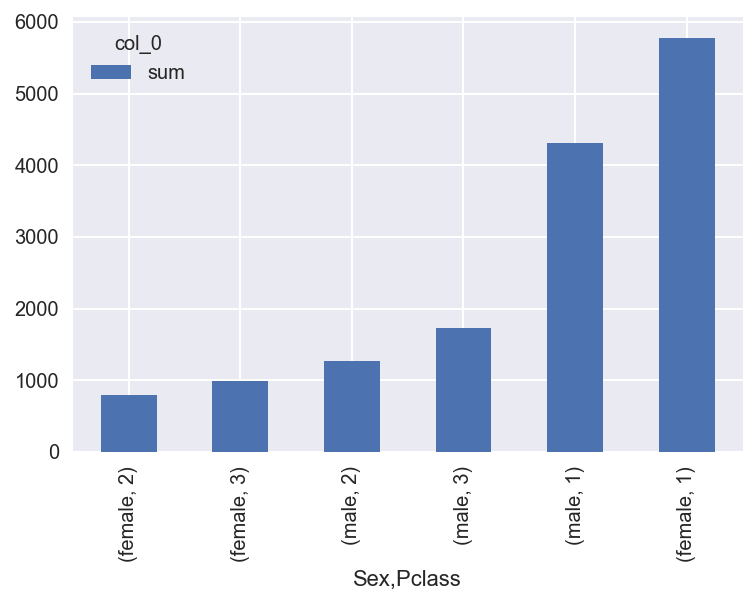

In [133]:
pd.crosstab([test.Sex , test.Pclass ], columns='sum', values=test.Fare ,aggfunc=sum).sort_values(by = 'sum' , ascending = True).plot(kind = 'bar');

In [134]:
train.shape

(891, 12)

In [135]:
test.shape

(418, 11)

In [136]:
train.set_index('PassengerId' , inplace=True) # setting index 

In [137]:
test.set_index('PassengerId' , inplace=True) # setting index 

In [138]:
train.columns = train.columns.str.lower()

## Cleaning

##### Checking null values 

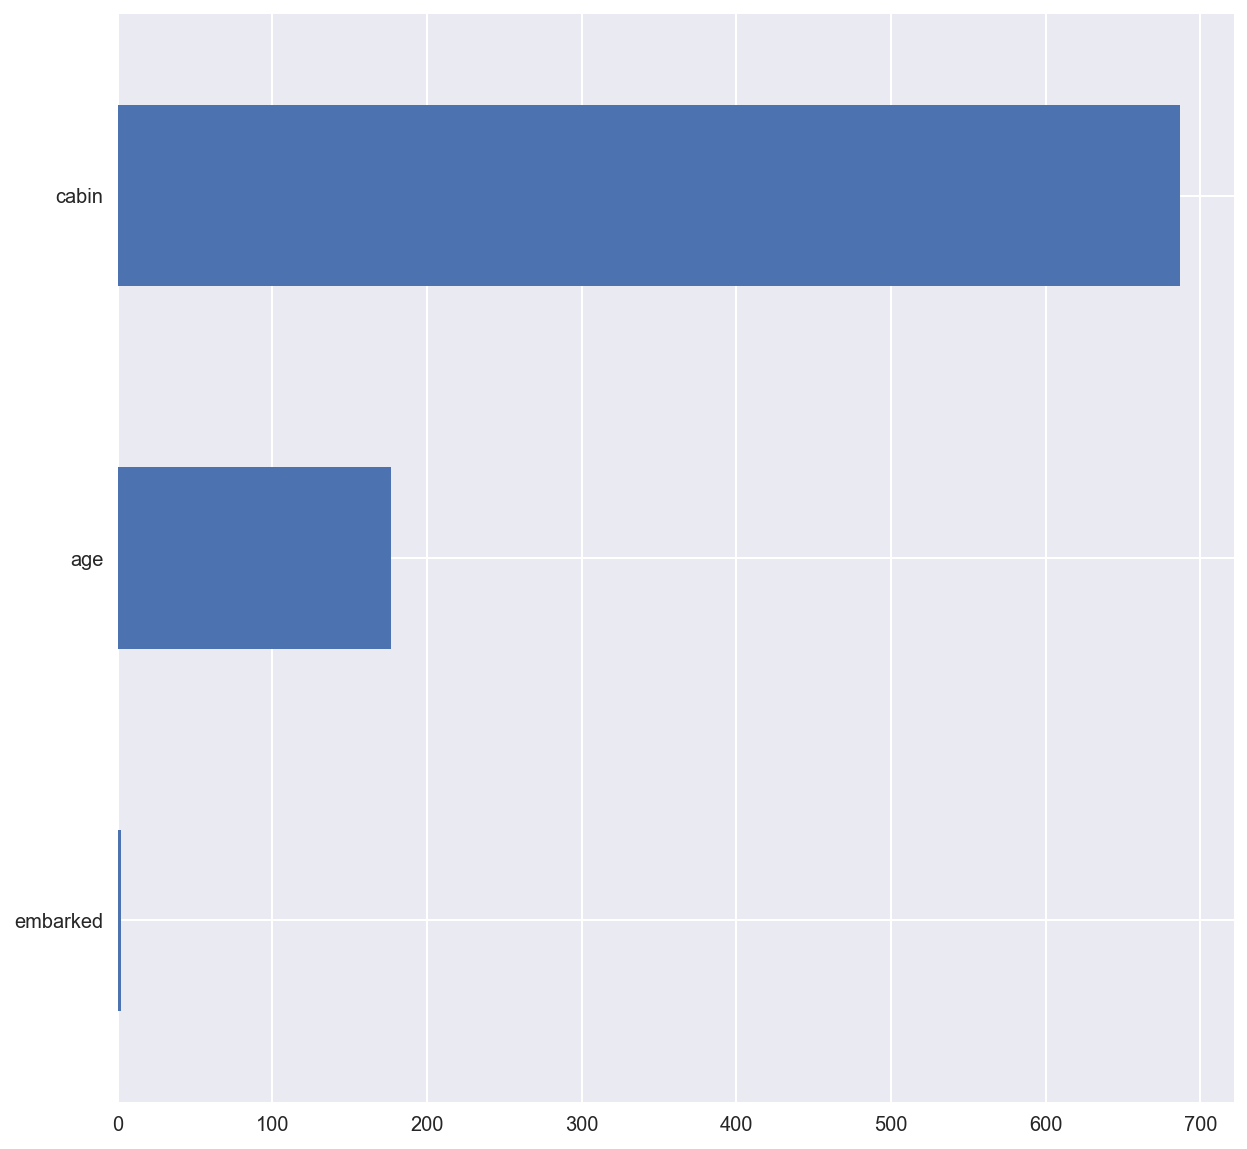

In [139]:
plt.figure(figsize=(10,10))
train.isnull().sum()[train.isnull().sum() != 0].sort_values(ascending = True).plot(kind ='barh');

##### impute the null values 
1. cabin = 'Unkown'
2. age = 'group the mean'
3. embarcked = 'S'

In [140]:
# converting the sex 
df = train.replace(['male' , 'female'] , [1,0] )
test = test.replace(['male' , 'female'] , [1,0] )

In [141]:
df.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [142]:
# because theses two column are famiely 
df['family_count'] = train.sibsp + train.parch 
test['family_count'] = test.SibSp + test.Parch 

In [143]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_count
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Unkown,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,Unkown,S,1


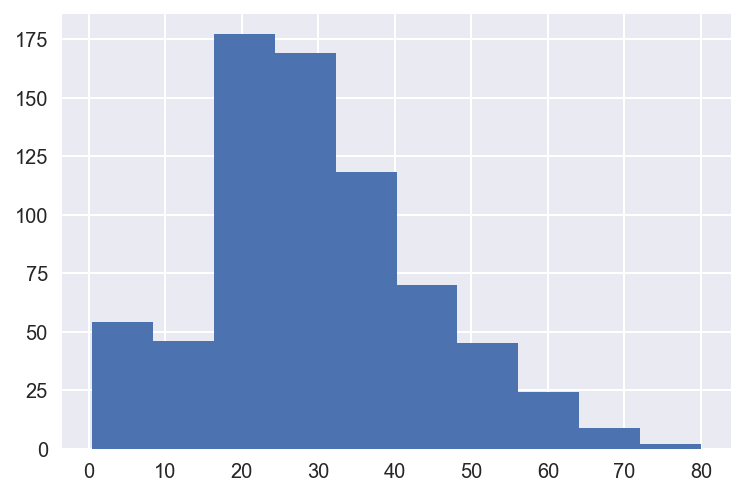

In [144]:
df.age.hist();

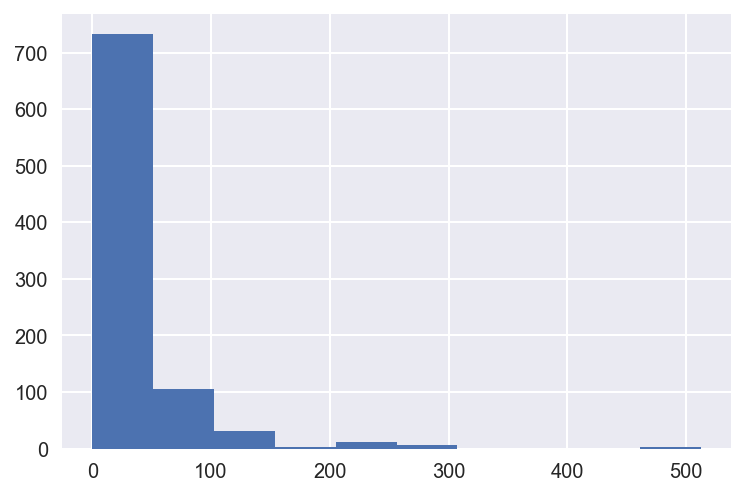

In [145]:
df.fare.hist();  

In [146]:
df.age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [147]:
df[(df['age'] > 0)  &  (df['age'] <1)] # رضع 

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_count
PassengerId,,,,,,,,,,,,
79,1,2,"Caldwell, Master. Alden Gates",1,0.83,0,2,248738,29.0000,NaN,S,2
306,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,3
470,1,3,"Baclini, Miss. Helene Barbara",0,0.75,2,1,2666,19.2583,NaN,C,3
645,1,3,"Baclini, Miss. Eugenie",0,0.75,2,1,2666,19.2583,NaN,C,3
756,1,2,"Hamalainen, Master. Viljo",1,0.67,1,1,250649,14.5000,NaN,S,2
804,1,3,"Thomas, Master. Assad Alexander",1,0.42,0,1,2625,8.5167,NaN,C,1
832,1,2,"Richards, Master. George Sibley",1,0.83,1,1,29106,18.7500,NaN,S,2


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   name          891 non-null    object 
 3   sex           891 non-null    int64  
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   ticket        891 non-null    object 
 8   fare          891 non-null    float64
 9   cabin         204 non-null    object 
 10  embarked      889 non-null    object 
 11  family_count  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


#### cleaning the null values 

In [149]:
df.isnull().sum().sort_values(ascending = False)

cabin           687
age             177
embarked          2
family_count      0
fare              0
ticket            0
parch             0
sibsp             0
sex               0
name              0
pclass            0
survived          0
dtype: int64

In [150]:
df.cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [151]:
# we can impute with Unkown
df.cabin.fillna('Unkown',inplace=True)

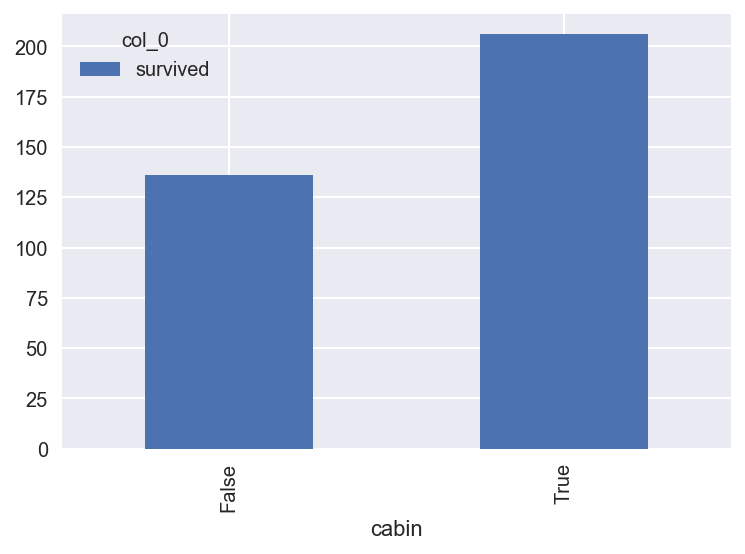

In [152]:
pd.crosstab(df.cabin == 'Unkown' , columns='survived' , values=df.survived , aggfunc=sum).plot(kind = 'bar');

In [153]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,family_count
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.016639
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.065997
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.200988
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.301914
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.890712
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.783111
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.217138
family_count,0.016639,0.065997,-0.200988,-0.301914,0.890712,0.783111,0.217138,1.000000


In [154]:
df[df.age.isnull()][60:200]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_count
PassengerId,,,,,,,,,,,,
304,1,2,"Keane, Miss. Nora A",0,NaN,0,0,226593,12.3500,E101,Q,0
305,0,3,"Williams, Mr. Howard Hugh ""Harry""",1,NaN,0,0,A/5 2466,8.0500,Unkown,S,0
307,1,1,"Fleming, Miss. Margaret",0,NaN,0,0,17421,110.8833,Unkown,C,0
325,0,3,"Sage, Mr. George John Jr",1,NaN,8,2,CA. 2343,69.5500,Unkown,S,10
331,1,3,"McCoy, Miss. Agnes",0,NaN,2,0,367226,23.2500,Unkown,Q,2
...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,Unkown,C,0
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,Unkown,S,10
869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,Unkown,S,0


In [155]:
# want to take the title of people 
df['title'] = df.name.str.split('[,.]',expand = True)[1]
test['title'] = test.Name.str.split('[,.]',expand = True)[1]


In [156]:
# dealing with nulles in age  
df['age'] = df.groupby(["sex", 'pclass'])["age"].transform(lambda x: x.fillna(x.mean()))

In [157]:
df.isnull().sum()

survived        0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        2
family_count    0
title           0
dtype: int64

In [158]:
df[df.embarked.isnull()]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,family_count,title
PassengerId,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN,0,Miss
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN,0,Mrs


In [159]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [160]:
# it will be S emarcked you can check the info in this website
#https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [161]:
df.embarked.fillna('S' , inplace=True)

In [162]:
df.isnull().sum()

survived        0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
family_count    0
title           0
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   pclass        891 non-null    int64  
 2   name          891 non-null    object 
 3   sex           891 non-null    int64  
 4   age           891 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   ticket        891 non-null    object 
 8   fare          891 non-null    float64
 9   cabin         891 non-null    object 
 10  embarked      891 non-null    object 
 11  family_count  891 non-null    int64  
 12  title         891 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [164]:
# create categories bassed on age
binss=[0, 5, 12, 18, 35, 60, 100]
label_names = ['infant', "child", 'teenager', "young Adult", 'adult', 'senior']
df['age_group']= pd.cut(df.age,bins=binss,labels=label_names)
################################################################
# create categories bassed on age
binss=[0, 5, 12, 18, 35, 60, 100]
label_names = ['infant', "child", 'teenager', "young Adult", 'adult', 'senior']
test['age_group']= pd.cut(test.Age,bins=binss,labels=label_names)


### EDA 

In [165]:
df._get_numeric_data()

,survived,pclass,sex,age,sibsp,parch,fare,family_count
PassengerId,,,,,,,,
1,0,3,1,22.00,1,0,7.2500,1
2,1,1,0,38.00,1,0,71.2833,1
3,1,3,0,26.00,0,0,7.9250,0
4,1,1,0,35.00,1,0,53.1000,1
5,0,3,1,35.00,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
887,0,2,1,27.00,0,0,13.0000,0
888,1,1,0,19.00,0,0,30.0000,0
889,0,3,0,21.75,1,2,23.4500,3


In [166]:
print(f' survival rate is {df.survived.value_counts(normalize=True)[1]}%') 

 survival rate is 0.3838383838383838%


In [167]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
sex,891.000000,0.647587,0.477990,0.000000,0.000000,1.000000,1.000000,1.000000
age,891.000000,29.318643,13.281103,0.420000,21.750000,26.507589,36.000000,80.000000
sibsp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
family_count,891.000000,0.904602,1.613459,0.000000,0.000000,0.000000,1.000000,10.000000


In [168]:
df.corrwith(df.survived)[1:]

pclass         -0.338481
sex            -0.543351
age            -0.067485
sibsp          -0.035322
parch           0.081629
fare            0.257307
family_count    0.016639
dtype: float64

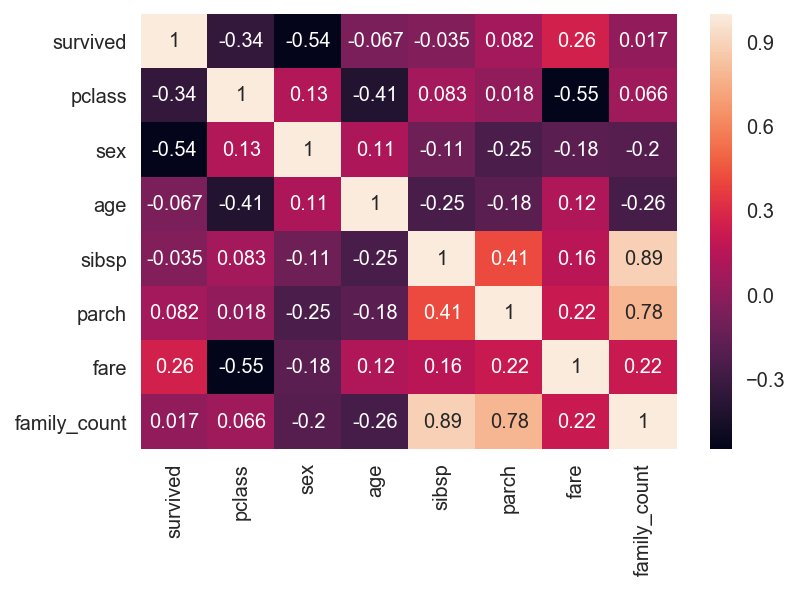

In [169]:
sns.heatmap(df.corr() ,annot=True , vmax=True);

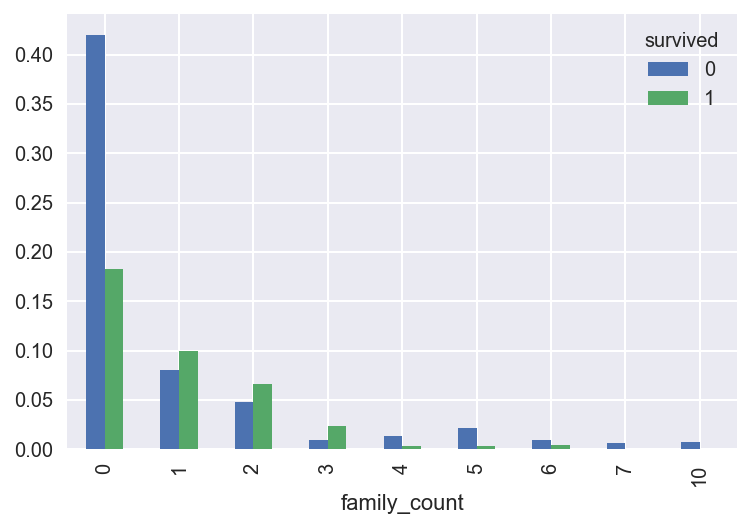

In [170]:
pd.crosstab(df.family_count , df.survived  , normalize=True).plot(kind = 'bar');

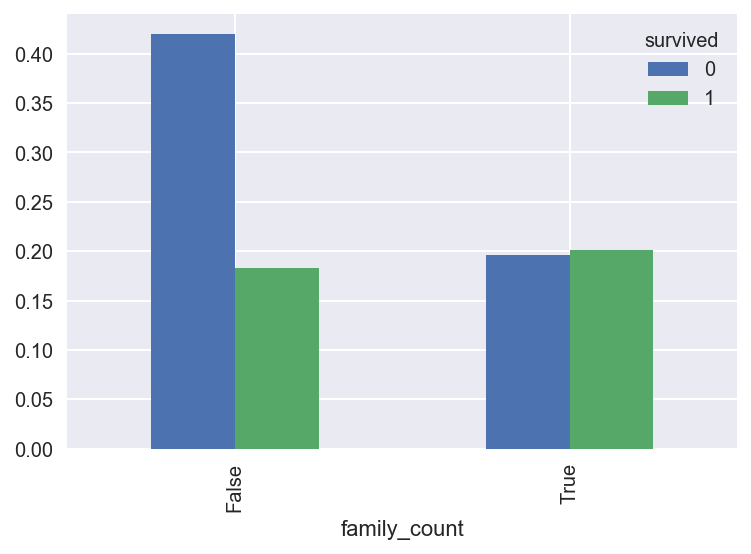

In [171]:
pd.crosstab(df.family_count > 0  , df.survived  , normalize=True).plot(kind = 'bar');

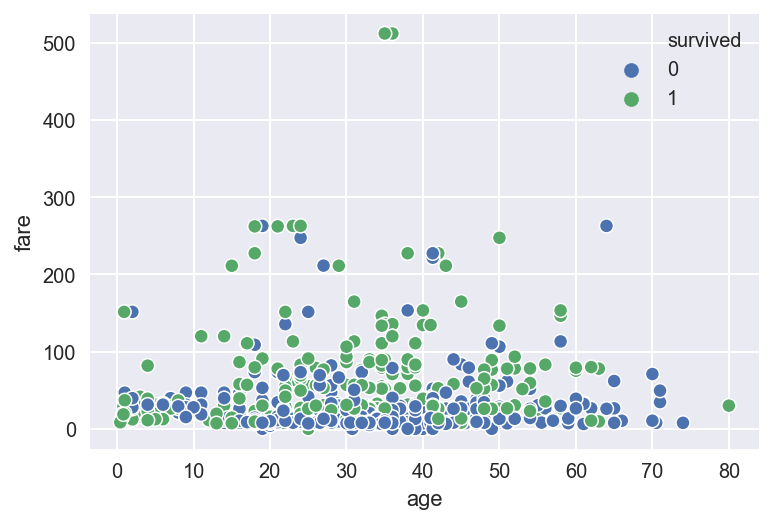

In [172]:
sns.scatterplot( x=df.age,
    y=df.fare,
    hue=df.survived);

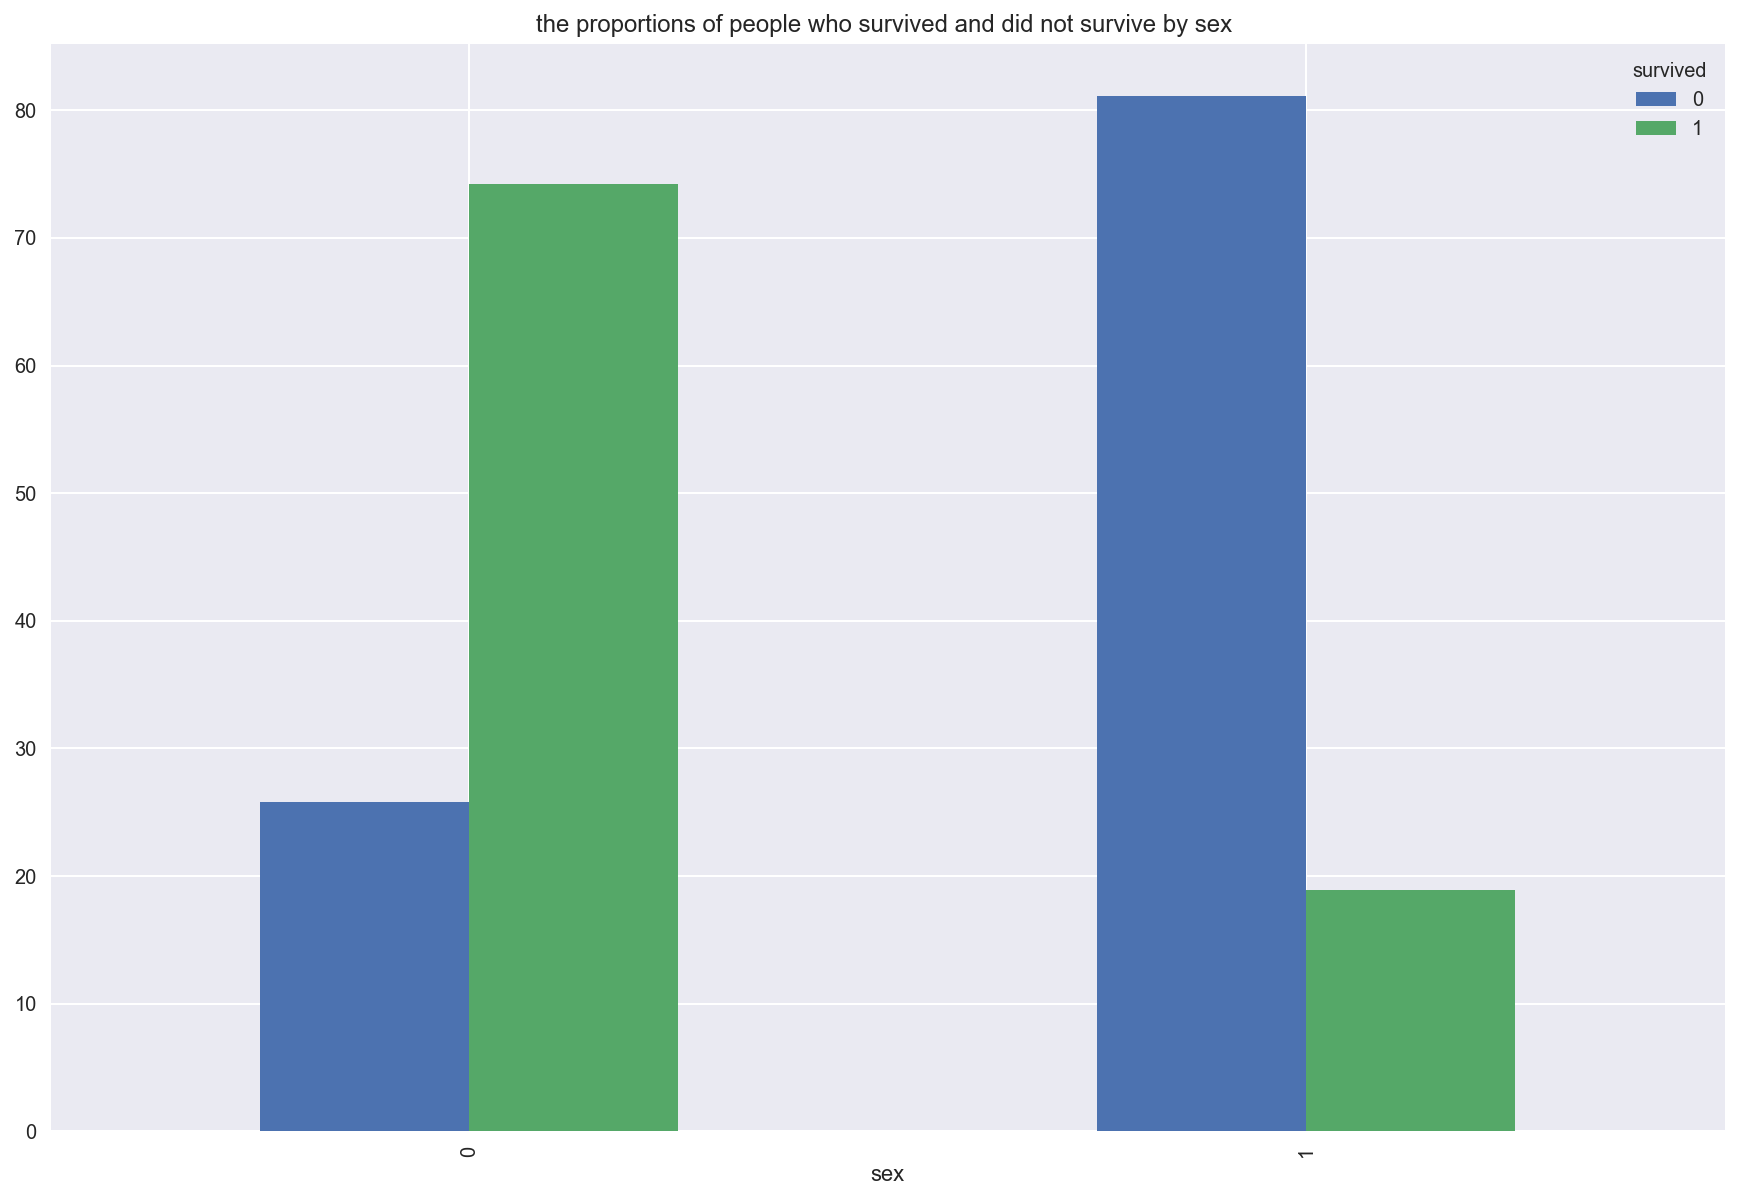

In [173]:
sx=pd.crosstab(df.sex,df.survived, normalize='index').mul(100)
sx.plot(kind='bar', figsize=(15, 10)); # the proportions of people who survived and did not survive 
plt.title('the proportions of people who survived and did not survive by sex ');


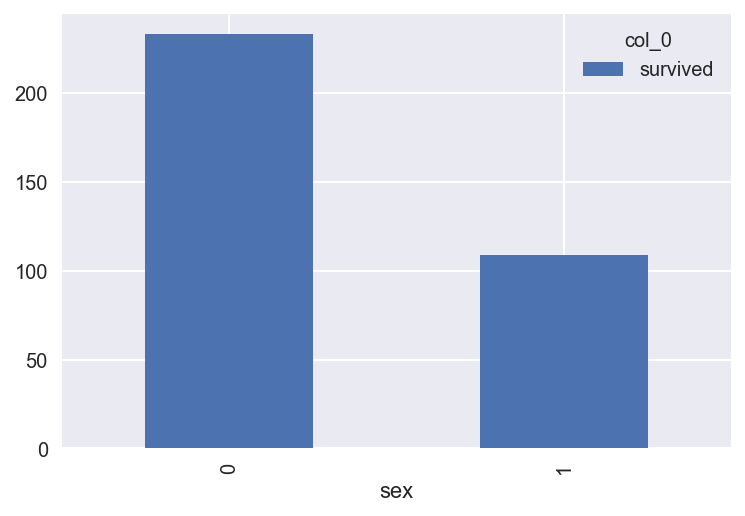

In [174]:
pd.crosstab(df.sex , 'survived' , values=df.survived , aggfunc=sum).plot(kind ='bar');

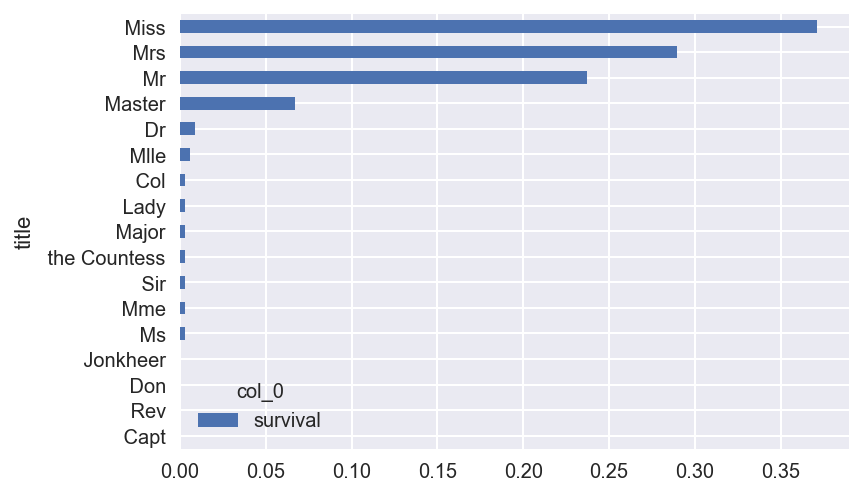

In [175]:
# dose the title make diffrence 
pd.crosstab(df.title , 'survival' , values=df.survived , aggfunc=sum , normalize=True ).sort_values(by = 'survival').plot(kind ='barh');

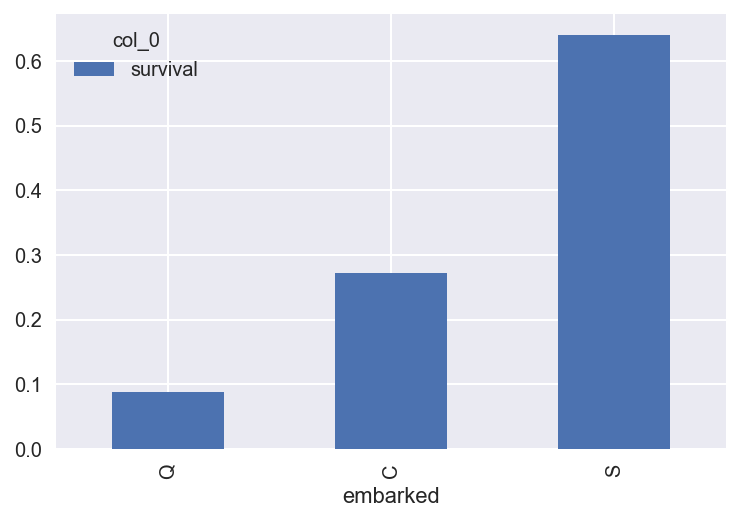

In [176]:
pd.crosstab([df.embarked], 'survival' ,  values=df.survived , aggfunc=sum ,normalize=True).sort_values(by = 'survival').plot(kind = 'bar');

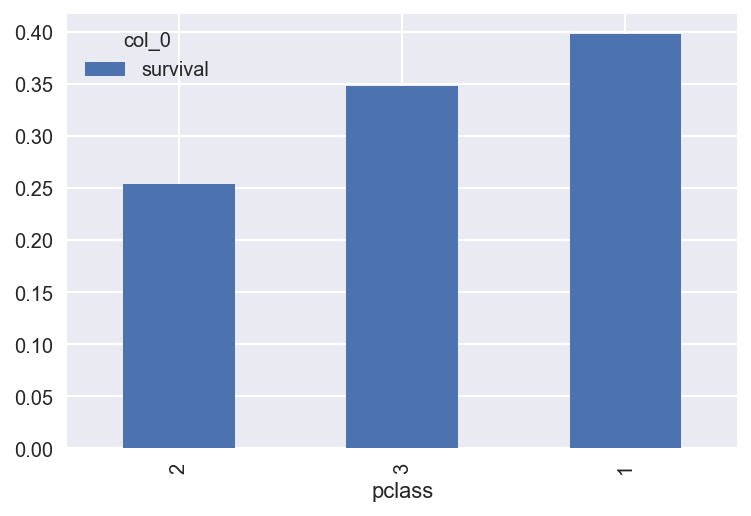

In [177]:
pd.crosstab(df.pclass, 'survival',  values=df.survived , aggfunc=sum ,normalize=True).sort_values(by = 'survival').plot(kind = 'bar');

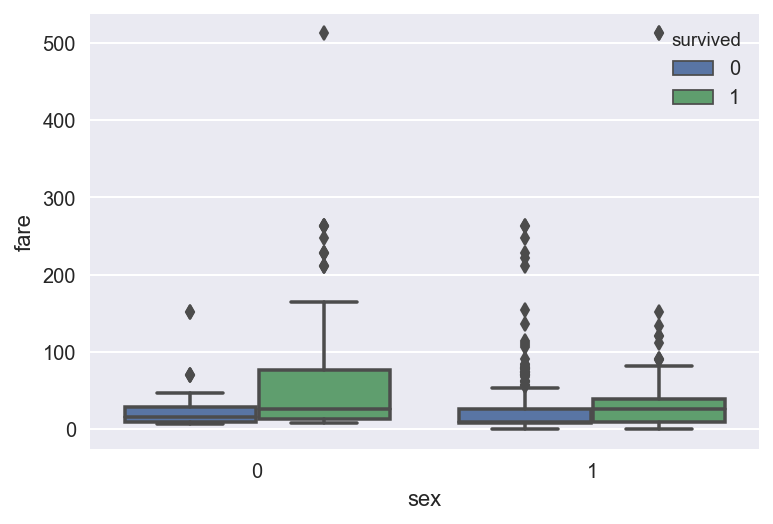

In [178]:
sns.boxplot( x=df.sex,
    y=df.fare,
    hue=df.survived);

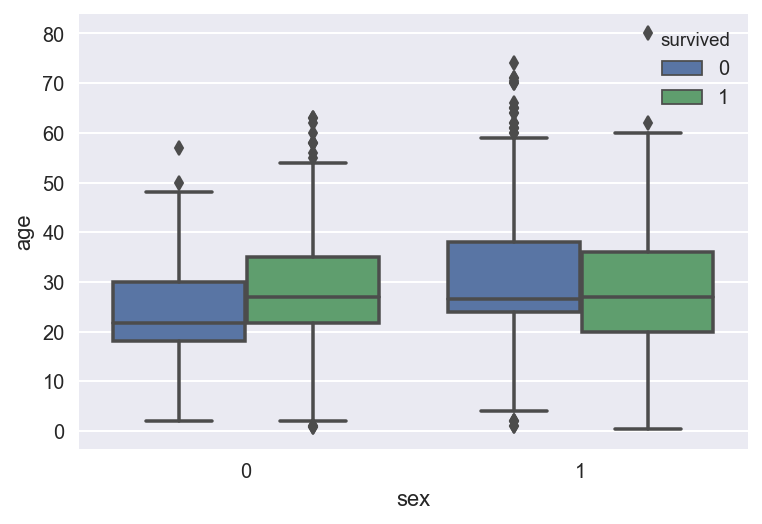

In [179]:
sns.boxplot( x=df.sex,
    y=df.age,
    hue=df.survived);

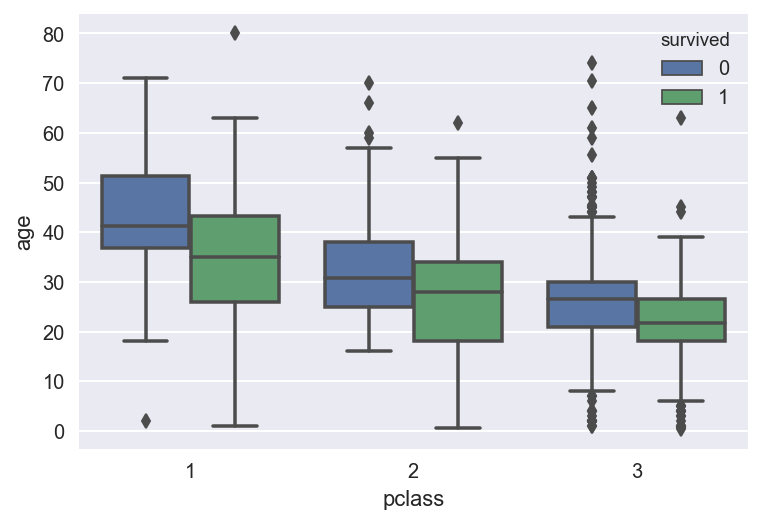

In [180]:
sns.boxplot( x=df.pclass,
    y=df.age,
    hue=df.survived);

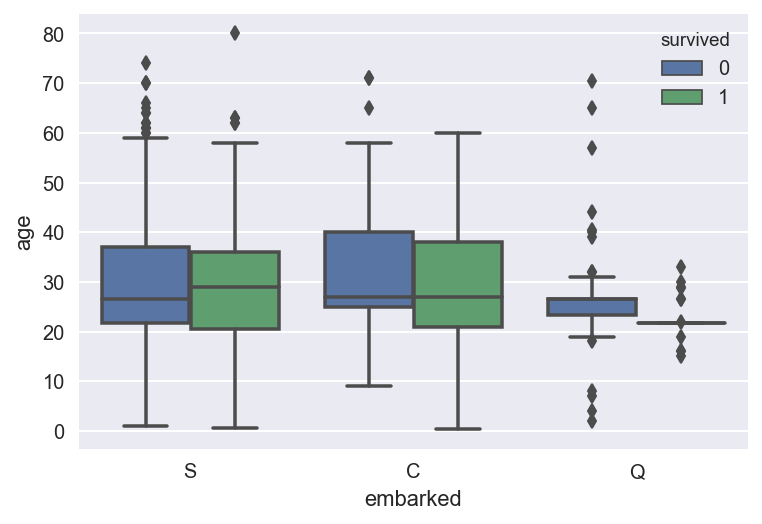

In [181]:
sns.boxplot( x=df.embarked,
    y=df.age,
    hue=df.survived);

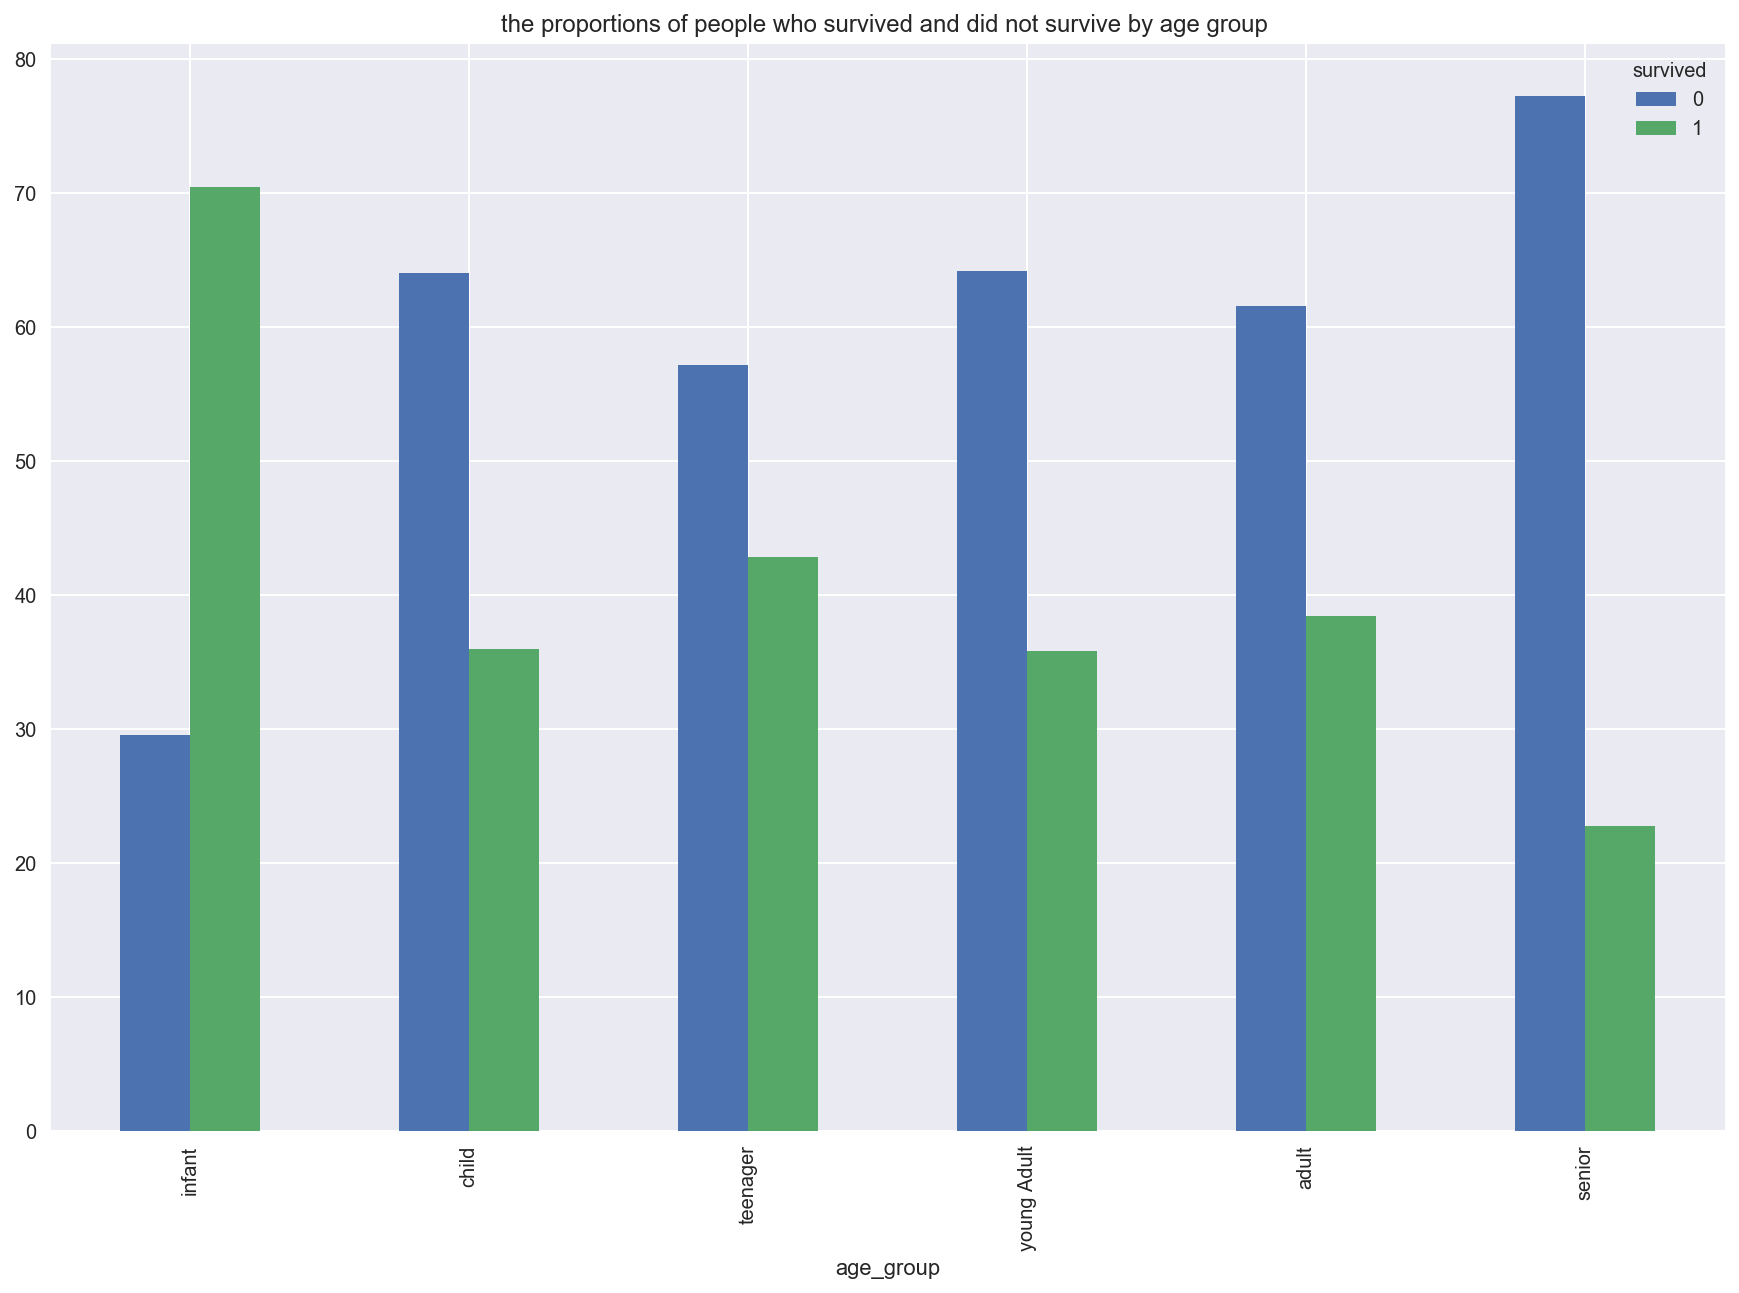

In [182]:
sx=pd.crosstab(df.age_group,df.survived, normalize='index').mul(100)
sx.plot(kind='bar', figsize=(15, 10)); # the proportions of people who survived and did not survive 
plt.title('the proportions of people who survived and did not survive by age group ');


### Dummies Varibeles

In [183]:
df_dum = pd.get_dummies(df.drop(['name','ticket' ,'cabin'] , axis = 1) , drop_first=True)
test_dum = pd.get_dummies(test.drop(['Name','Ticket' ,'Cabin'] , axis = 1) , drop_first=True)

In [184]:
df_dum.shape , test_dum.shape

((891, 31), (418, 22))

##### here we will make the train's shape  as equal as the test's shape

In [185]:
df_dum.drop(columns= ['title_ Col','title_ Jonkheer','title_ Lady','title_ Major','title_ Mlle'
,'title_ Mme','title_ Sir','title_ the Countess'],inplace=True) #these col are not exist in the test df

In [186]:
df_dum = df_dum.iloc[0:418] 

In [187]:
df_dum.shape, test_dum.shape 

((418, 23), (418, 22))

## Modeling 

In [188]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [189]:
df_dum.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'family_count', 'embarked_Q', 'embarked_S', 'title_ Don', 'title_ Dr',
       'title_ Master', 'title_ Miss', 'title_ Mr', 'title_ Mrs', 'title_ Ms',
       'title_ Rev', 'age_group_child', 'age_group_teenager',
       'age_group_young Adult', 'age_group_adult', 'age_group_senior'],
      dtype='object')

In [190]:
test_dum.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'family_count',
       'Embarked_Q', 'Embarked_S', 'title_ Dona', 'title_ Dr', 'title_ Master',
       'title_ Miss', 'title_ Mr', 'title_ Mrs', 'title_ Ms', 'title_ Rev',
       'age_group_child', 'age_group_teenager', 'age_group_young Adult',
       'age_group_adult', 'age_group_senior'],
      dtype='object')

#### 1 - X = all of the features 

In [191]:
X = df_dum.copy()
X.drop(['survived','sibsp','parch'], axis = 1 , inplace = True)

#### 2 - X = with high 

In [192]:
#feature_col = ['fare','pclass','sex', 'title_ Miss', 'title_ Mr', 'title_ Mrs'] another predictors 

In [193]:
#X= df_dum[feature_col]

In [194]:
y = df_dum.survived

In [195]:
X.shape , y.shape

((418, 20), (418,))

In [196]:
 X_train, X_test, y_train, y_test = train_test_split(X ,y , shuffle = True , test_size = .3, stratify=y)

In [197]:
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [198]:
knn = KNeighborsClassifier()
knn.fit(X_train_std , y_train)
print(knn.score(X_test_std, y_test))
knn.score(X_train_std , y_train)

0.7777777777777778


0.8527397260273972

In [199]:
knn.predict(X_test_std)

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

#### 1 - X = all of the features 

In [200]:
X_pred_test = test_dum.copy()
X_pred_test.drop(['SibSp','Parch'], axis = 1 , inplace = True)

#### 2 - X = with high 

In [201]:
##ts_feature_col = ['fare','pclass','sex', 'title_ Miss', 'title_ Mr', 'title_ Mrs'] another predictors 

In [202]:
##X_pred_test = test_dum[ts_feature_col]

In [203]:
X_pred_test.shape , y.shape

((418, 20), (418,))

In [204]:
Survived_pred_knn = knn.predict(X_pred_test)

In [205]:
Survived_pred_knn

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,

In [206]:
test_dum.reset_index(inplace=True)

In [207]:
gender_submission = pd.DataFrame({'PassengerId': test_dum.PassengerId, 'Survived': Survived_pred_knn})
# you could use any filename. We choose submission here
gender_submission.to_csv('gender_submission.csv', index=False)


<img src= 'Titanc_knn_score.png'>

-----------------------------------------------------------------------------------------------------

In [208]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [209]:
lr = LogisticRegression()
lr.fit(X_train_std , y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
lr.score(X_train_std , y_train)

0.8424657534246576

In [211]:
lr.score(X_test_std,y_test)

0.7777777777777778

In [212]:
pred = lr.predict(X_test_std)

In [213]:
survived_pred_lr = lr.predict(X_pred_test)

In [214]:
survived_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<img src='Titanic_lr_score.png'>

In [215]:
print(classification_report(y_test , pred ))
print(confusion_matrix(y_test , pred ))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83        77
           1       0.76      0.63      0.69        49

    accuracy                           0.78       126
   macro avg       0.77      0.75      0.76       126
weighted avg       0.78      0.78      0.77       126

[[67 10]
 [18 31]]


In [216]:
df.survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

------------------------------------------------------------------------------------

### Random Forest

In [217]:
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)
print(rfc.score(X_train , y_train))
rfc.score(X_test , y_test)

0.9691780821917808


0.7698412698412699

In [218]:
survived_pred_rfc = rfc.predict(X_pred_test)

In [219]:
survived_pred_rfc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [220]:
gender_submission = pd.DataFrame({'PassengerId': test_dum.PassengerId, 'Survived': survived_pred_rfc})
# you could use any filename. We choose submission here
gender_submission.to_csv('gender_submission.csv', index=False)

<img src='Titanic_random_fc_score.png'>

--------------------------------------------------------------------------------------------------------------

#### Bagging and Random Forest

In [221]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator= RandomForestClassifier())
bc.fit(X_train , y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
    

In [222]:
bc.score(X_train , y_train)

0.9486301369863014

In [223]:
bc.score(X_test , y_test)

0.8015873015873016

In [224]:
survived_pred_bc = bc.predict(X_pred_test)

In [225]:
survived_pred_bc

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<img src= 'Titanic_bagging_rfc_score.png'>

## Bagging with knn 

In [226]:
from sklearn.ensemble import BaggingClassifier
bc_knn = BaggingClassifier(base_estimator= knn,n_estimators=20, oob_score=True, max_features=.9)
bc_knn.fit(X_train , y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.9,
                  max_samples=1.0, n_estimators=20, n_jobs=None, oob_score=True,
                  random_state=None, verbose=0, warm_start=False)

In [227]:
bc_knn.score(X_train , y_train)

0.821917808219178

In [228]:
bc_knn.score(X_test , y_test)

0.6825396825396826

In [229]:
servived_pred_bc_knn = bc_knn.predict(X_pred_test)

In [230]:
servived_pred_bc_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

--------------------------------------------------------------------------------------------------

##### Decision Tree with Bagging 

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [233]:
dt.score(X_train,y_train)

0.9965753424657534

In [234]:
dt.score(X_test,y_test)

0.7063492063492064

In [235]:
dt_en = BaggingClassifier(base_estimator=dt, n_estimators=20, oob_score=True )
dt_en.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [236]:
dt_en.score(X_train, y_train)

0.9931506849315068

In [237]:
dt_en.score(X_test, y_test)

0.7619047619047619

In [238]:
dt_en.oob_score_

0.7602739726027398

In [239]:
servived_pred_dt_bag = dt_en.predict(X_pred_test)

In [240]:
servived_pred_dt_bag

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

----------------------------------------------------------------------------------

#### Another Random Forest

In [241]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion ='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=10,
                        n_jobs=None, oob_score=False, random_state=322861580,
                        verbose=0, warm_start=False)
rfc.fit(X_train , y_train)
print(rfc.score(X_train , y_train))
rfc.score(X_test , y_test)

0.9794520547945206


0.7301587301587301

In [242]:
survived_pred_rfc_bootstrap = rfc.predict(X_pred_test)

In [243]:
survived_pred_rfc_bootstrap

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<img src= 'Titanic_rfc_bootstrap_score.png'>

---------------------------------------------------------------------------------------------------

#### Knn with GridSearch 

In [244]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 200],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}

In [245]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

gs = GridSearchCV(knn, 
                  param_grid, 
                  cv=5,
                  scoring='roc_auc')

In [246]:
gs.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 20, 50, 200],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [247]:
gs.score(X_train_std , y_train)

0.9999753597476838

In [248]:
gs.score(X_test_std , y_test)

0.7808110257089848

In [249]:
survived_pred_grid_knn = gs.predict(X_pred_test)

In [250]:
survived_pred_grid_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [251]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

<img src= 'Titanic_grid_knn_score.png'>

------------------------------------------------------------------------------------------------------------

### Logisitc and GridSearch

In [252]:
param_grid = {
    'max_iter': [3, 5, 7, 9, 11, 20, 50, 100],
    'penalty': ['l1', 'l2'],
}


In [253]:
lr = LogisticRegression()

In [254]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(lr, 
                  param_grid, 
                  cv=5,
                  scoring='roc_auc')

In [255]:
gs.fit(X_train_std , y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_iter': [3, 5, 7, 9, 11, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [256]:
gs.score(X_train,y_train)

0.7479055785531243

In [257]:
gs.score(X_test,y_test)

0.6908295785846806

In [258]:
gs_lr_prd_test = gs.predict(X_pred_test)

In [259]:
gs_lr_prd_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [260]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

-----------------------------------------------------------------------------------------

#### another Logistic model 

In [261]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
lr.fit(X_train_std , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
lr.score(X_train_std , y_train)


0.839041095890411

In [264]:
lr.score(X_test_std , y_test)

0.7936507936507936

In [265]:
pred_logis_test = lr.predict(X_pred_test)

In [266]:
pred_logis_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

------------------------------------------------------------------------------------------------------------------

#### SVM model 

In [267]:
svm = SVC()
svm.fit(X_train_std , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [268]:
svm.score(X_train_std , y_train)

0.8493150684931506

In [269]:
svm.score(X_test_std , y_test)

0.8174603174603174

In [270]:
pred_svm_std_test = svm.predict(X_pred_test)

In [271]:
pred_svm_std_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

---------------------------------------------------------------------------------------------------------------

#### SVM without scalling 

In [272]:
svm1 = SVC()
svm1.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [273]:
svm1.score(X_train, y_train)

0.8938356164383562

In [274]:
svm1.score(X_test, y_test)

0.6587301587301587

In [275]:
pred_svm_test = svm1.predict(X_pred_test)

In [276]:
pred_svm_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [277]:
gender_submission = pd.DataFrame({'PassengerId': test_dum.PassengerId, 'Survived': pred_svm_test})
# you could use any filename. We choose submission here
gender_submission.to_csv('gender_submission.csv', index=False)